<a href="https://colab.research.google.com/github/KimEulJoong/Wine-Classification-AI/blob/main/%EC%9D%91%EC%9A%A9%EC%88%98%ED%95%99_2023%EB%85%84_1%ED%95%99%EA%B8%B0_2017015026_%EA%B9%80%EC%9D%84%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

In [ ]:
#데이터 파일 불러오기
from google.colab import files
uploaded_files=files.upload()
uploaded_files=files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


In [ ]:
#Load Data!
train= pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [ ]:
#drop index column
train= train.drop(['index'],axis=1)
train= train.drop(['quality'],axis=1)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test= test.drop(['index'],axis=1)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.shape, test.shape

((5497, 12), (1000, 12))

In [ ]:
#info 활용
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5497 non-null   float64
 1   volatile acidity      5497 non-null   float64
 2   citric acid           5497 non-null   float64
 3   residual sugar        5497 non-null   float64
 4   chlorides             5497 non-null   float64
 5   free sulfur dioxide   5497 non-null   float64
 6   total sulfur dioxide  5497 non-null   float64
 7   density               5497 non-null   float64
 8   pH                    5497 non-null   float64
 9   sulphates             5497 non-null   float64
 10  alcohol               5497 non-null   float64
 11  type                  5497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 515.5+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
train.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
type                     object
dtype: object

In [ ]:
print(train['type'].unique())

['white' 'red']


In [ ]:
numeric_feature = train.columns[(train.dtypes==int)|(train.dtypes==float)]
categorical_feature = train.columns[train.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
카테고리형 데이터는 다음과 같습니다. 
 ['type']


white    4159
red      1338
Name: type, dtype: int64


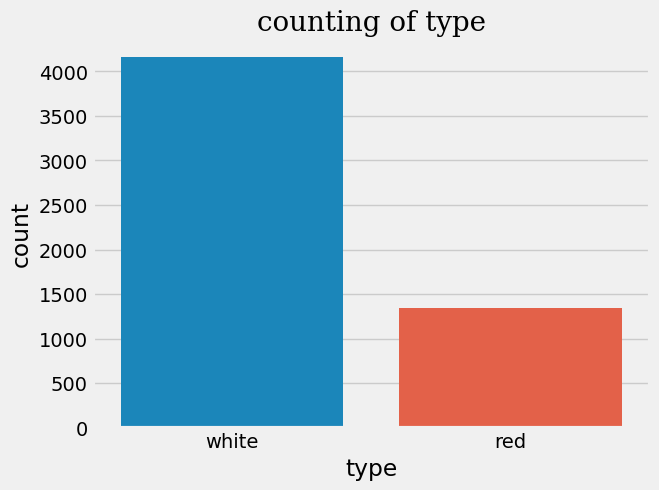

In [ ]:
#############################EDA시작#################################
print(train['type'].value_counts())
sns.countplot(x=train['type']);
plt.title("counting of type", fontfamily='serif',fontsize=20);

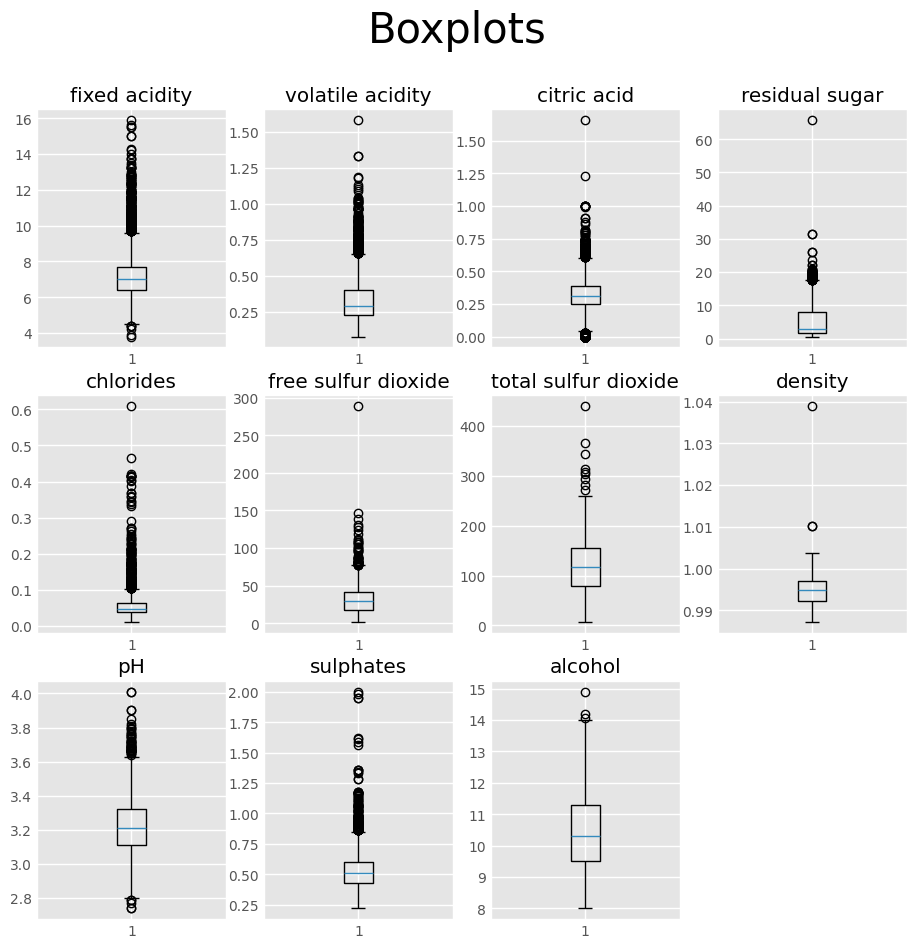

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(10,10))
plt.suptitle("Boxplots", fontsize=30)

for i in range(len(feature)):
  plt.subplot(3,4,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])
plt.show()

In [ ]:
#레이블 인코딩 실행
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

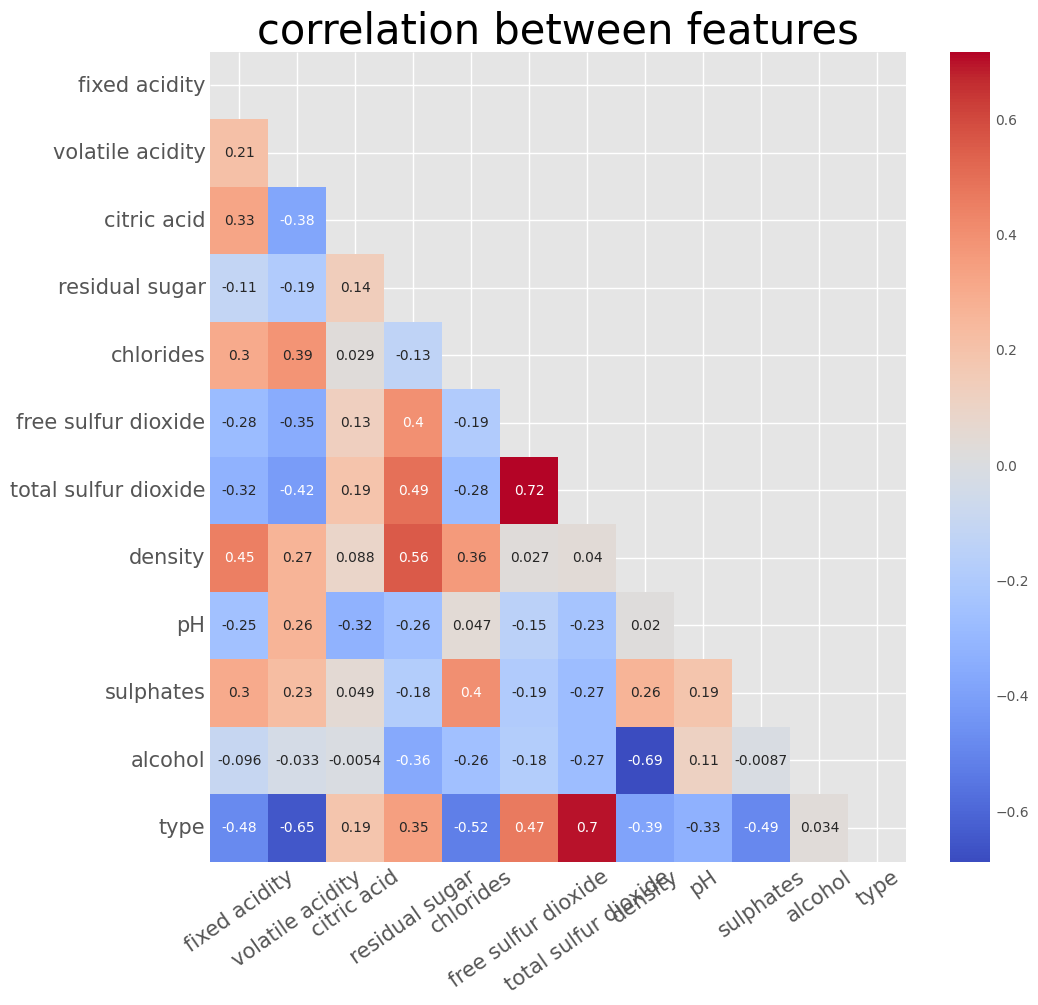

In [ ]:
plt.figure(figsize=(10,10))

heat_table=corr_df.corr()
mask=np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)]=True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=35)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=30)
plt.show()

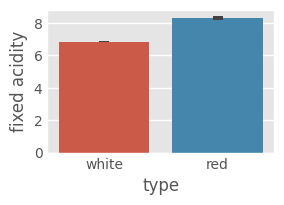

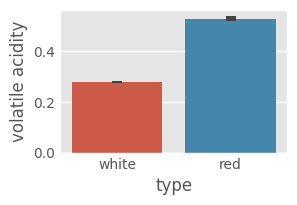

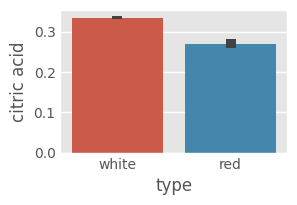

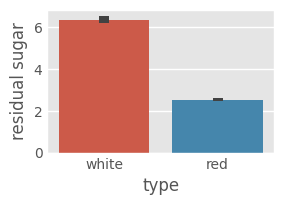

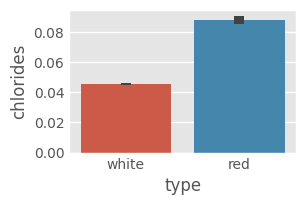

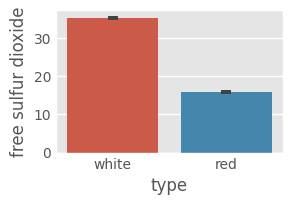

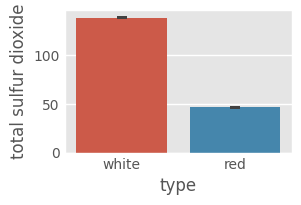

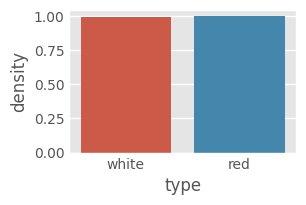

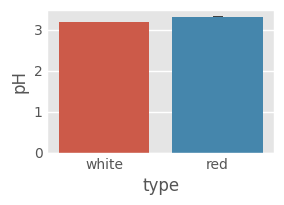

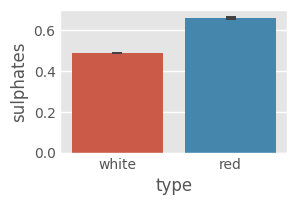

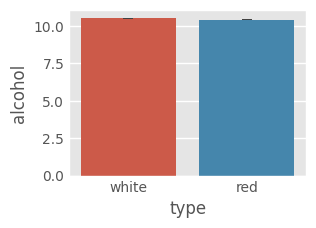

In [ ]:
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    plt.subplot(3,4,i+1)
    sns.barplot(x = 'type', y = train.columns[i], data = train)
plt.tight_layout()
plt.show()
#################################여기 까지 EDA###############################################

In [ ]:
#전처리 시작
from sklearn.preprocessing import LabelEncoder   #labelencoder를 사용해 문자열을 숫자형으로 변경, 사이킷런은 문자열을 입력값으로 받지 않기 때문

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])
#레이블 인코딩을 사용한 이유는 원핫 인코딩등과 비교해서 더 간편하기 때문
#레이블 인코딩의 단점은 숫자로 데이터를 변경하였을 때 숫자의 특성으로 인해 가중치로 인식하여 오류를 범할 수 있다는 것인데
#사용하는 ML모델이 랜덤 포레스트이고 결정트리를 이용하기 때문에 문제가 없다고 판단해서 사


In [ ]:
train.head()
#표에서 보이는 type 1이 white 이고, 0이 red 입니다.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
#X와 Y로 데이터 분할
X = train.drop('type', axis=1)
y = train['type']
#index와 qualitiy는 위에서 이미 삭제, 나머지 데이터는 모두 고려
#X는 독립변수, Y는 종속변수로 사용하기위해 다음과 같이 분할

In [ ]:
#무작위 시드 설정, 테스트 데이터 셋사이즈 20%
from sklearn.model_selection import train_test_split  #sklearn.model_selection에서 훈련,테스트 데이터 분할

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)     #train 붙은건 훈련, val 붙은건 검증
#random state를 통해 난수 설정을42로 한 것: 데이터를 분할하기 전에 데이터를 섞고 분할하는 방법을 결정해야함. 이것을 위해 random
#random state를 하지 않으면 난수 생성기가 다른 시드를 사용하거나 할 수 있고, 데이터 분할이 균일하지 못할 수 있다.
#즉 동일한 데이터 분할을 얻기 위해, 일관된 결과를 위해
#8:2로 나눈것은 그것이 국룰이니

In [ ]:
#########################학습 시작##############################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer

#누락된 값 대치 - X_train의 누락값에 의해 학습이 진행되지 않는 오류가 발생하여 진행하였음. 누락값 대치는 평균값(mean)으로 진행
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

#인스턴스 생성
rf_classifier = RandomForestClassifier()

#train
rf_classifier.fit(X_train_imputed, y_train)

RandomForestClassifier()

In [ ]:
######################################예측_테스트################################################
y_pred = rf_classifier.predict(X_val_imputed)

#정확도 계산
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

#재현율 계산
recall = recall_score(y_val, y_pred, average='macro')
print("Recall:", recall)

#정밀도 계산
precision = precision_score(y_val, y_pred, average='macro')
print("Precision:", precision)

#f1 계산
f1 = f1_score(y_val, y_pred, average='macro')
print("F1 Score:", f1)

Accuracy: 0.9936363636363637
Recall: 0.9891584297053977
Precision: 0.9931316646919431
F1 Score: 0.991126732159834


In [ ]:
import pickle

with open('2017015026_김을중.model', 'wb') as f:
    pickle.dump(rf_classifier, f)